In [2]:
import tensorflow as tf
import PIL
import PIL.Image
import numpy as np
import os

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 93s 0us/step


In [4]:
print(type(data_dir))
print(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))

<class 'pathlib.WindowsPath'>
C:\Users\shash\.keras\datasets\flower_photos


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [9]:
for x, l in train_ds.take(1):
    print(type(x), type(l))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


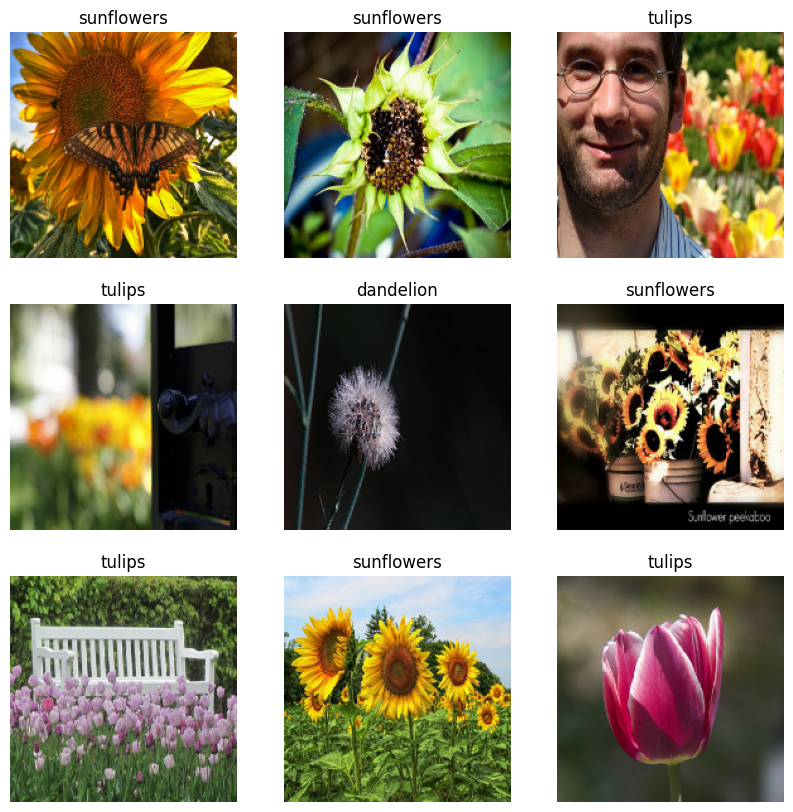

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


92/92 [==============================] - 33s 356ms/step - loss: 1.2368 - accuracy: 0.4717 - val_loss: 1.1251 - val_accuracy: 0.5613
Epoch 2/10
92/92 [==============================] - 31s 335ms/step - loss: 0.9826 - accuracy: 0.6127 - val_loss: 1.0041 - val_accuracy: 0.6158
Epoch 3/10
92/92 [==============================] - 29s 318ms/step - loss: 0.7793 - accuracy: 0.7033 - val_loss: 0.9751 - val_accuracy: 0.6335
Epoch 4/10
92/92 [==============================] - 29s 315ms/step - loss: 0.5934 - accuracy: 0.7766 - val_loss: 1.0550 - val_accuracy: 0.6226
Epoch 5/10
92/92 [==============================] - 29s 314ms/step - loss: 0.4855 - accuracy: 0.8266 - val_loss: 1.1327 - val_accuracy: 0.6471
Epoch 6/10
92/92 [==============================] - 30s 327ms/step - loss: 0.4067 - accuracy: 0.8529 - val_loss: 1.3554 - val_accuracy: 0.6199
Epoch 7/10
92/92 [==============================] - 29s 316ms/step - loss: 0.3053 - accuracy: 0.8842 - val_loss: 1.4702 - val_accuracy: 0.6213
Epoch 8/10

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

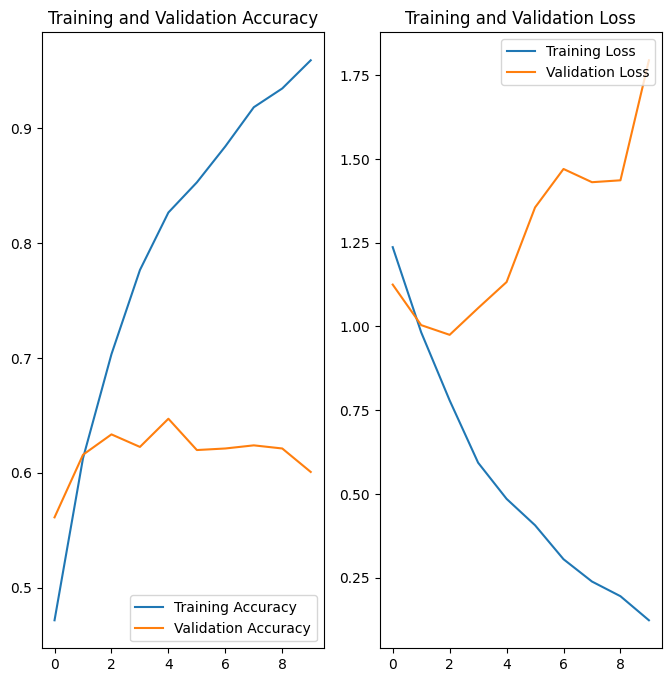

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 10
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

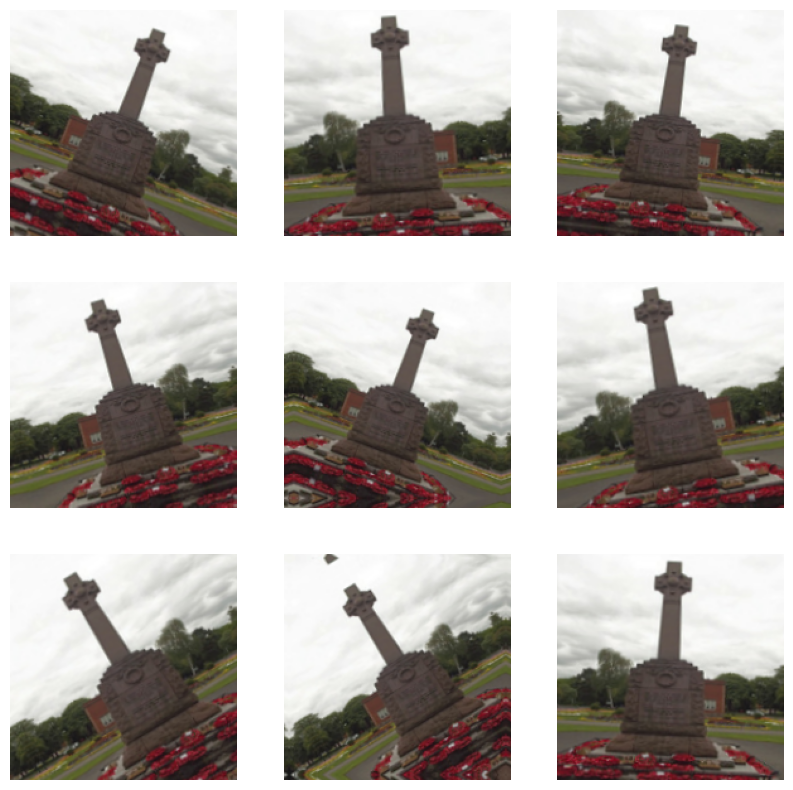

In [22]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    

In [23]:
model = keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


92/92 [==============================] - 27s 282ms/step - loss: 1.3645 - accuracy: 0.4131 - val_loss: 1.1747 - val_accuracy: 0.5054
Epoch 2/15
92/92 [==============================] - 27s 293ms/step - loss: 1.0480 - accuracy: 0.5777 - val_loss: 1.0088 - val_accuracy: 0.6049
Epoch 3/15
92/92 [==============================] - 25s 268ms/step - loss: 0.9643 - accuracy: 0.6223 - val_loss: 0.9926 - val_accuracy: 0.6158
Epoch 4/15
92/92 [==============================] - 25s 273ms/step - loss: 0.8956 - accuracy: 0.6519 - val_loss: 0.9609 - val_accuracy: 0.6185
Epoch 5/15
92/92 [==============================] - 25s 273ms/step - loss: 0.8435 - accuracy: 0.6689 - val_loss: 0.9439 - val_accuracy: 0.6335
Epoch 6/15
92/92 [==============================] - 28s 303ms/step - loss: 0.8000 - accuracy: 0.6945 - val_loss: 0.9178 - val_accuracy: 0.6417
Epoch 7/15
92/92 [==============================] - 31s 338ms/step - loss: 0.7482 - accuracy: 0.7193 - val_loss: 0.9086 - val_accuracy: 0.6335
Epoch 8/15

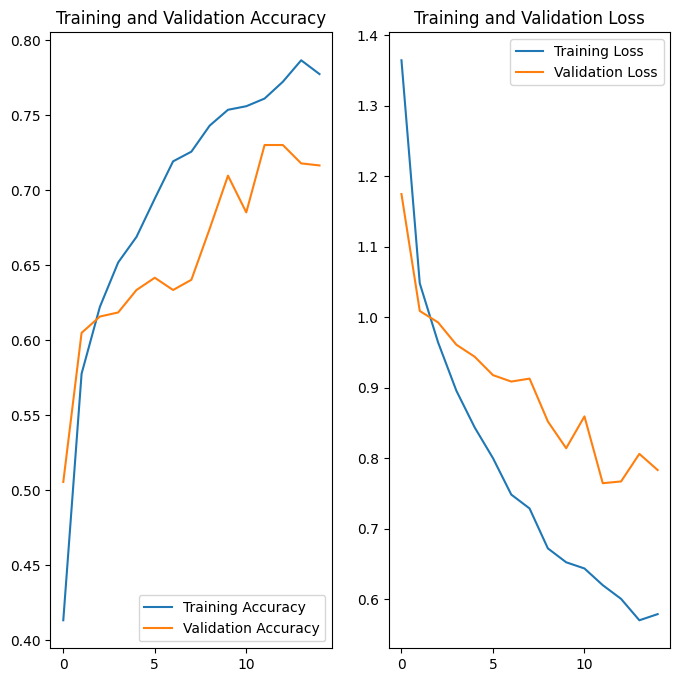

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = 15
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [30]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 185ms/step
This image most likely belongs to sunflowers with a 98.43 percent confidence.
